In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
import matplotlib

# Load data

In [6]:
test_k = np.load('../data/combined_data_k.npy')
test_high_fid = np.load('../data/combined_data_pk.npy')
test_low_fid = np.load('../data/combined_data_pk_low_fid.npy')

ask detail about which is parameter and so on.

NPE or NLE
summary stats
which is u, \theta, x
whats test_k?
rough computational cost 
can we just reduce the noise?
draft to fx and ayush

# Add seed-matched noise and plot

/var/folders/r6/jlzvq0td5mqf05q5jm6fs2vm0000gp/T/ipykernel_83741/3403692258.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


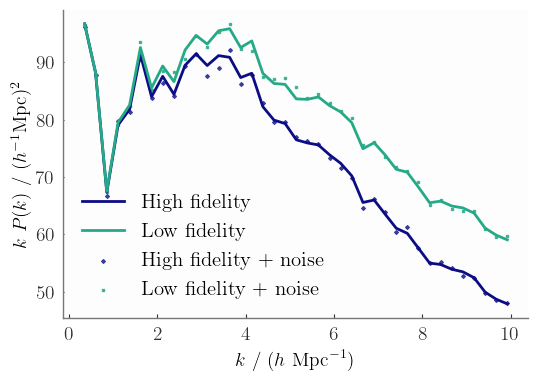

In [37]:
index_sim = 5

# noise realization has form of A * ( B + P(k)), i.e. shot noise and cosmic variance, where A and B depend on the "experimental setup"
# noise_realization_hf = np.random.normal(loc=np.zeros_like(test_k), scale=0.2*(0.05 + test_high_fid[index_sim]))
# noise_realization_lf = np.random.normal(loc=np.zeros_like(test_k), scale=0.2*(0.05 + test_low_fid[index_sim]))

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

colors = ["#0C0C85", "#25A986"]
noise_realization_hf = np.random.normal(loc=np.zeros_like(test_k), scale=0.01*(0.05 + test_high_fid[index_sim]))
noise_realization_lf = np.random.normal(loc=np.zeros_like(test_k), scale=0.01*(0.05 + test_low_fid[index_sim]))

ax.plot(test_k, test_k*test_high_fid[index_sim], c=colors[0], label='High fidelity')
ax.plot(test_k, test_k*test_low_fid[index_sim], c=colors[1], label='Low fidelity')

ax.scatter(test_k, test_k*(noise_realization_hf+test_high_fid[index_sim]), c=colors[0], alpha=0.8,s=4, marker='x',label='High fidelity + noise')
ax.scatter(test_k, test_k*(noise_realization_lf+test_low_fid[index_sim]), c=colors[1], alpha=0.8,s=4,marker='s',label='Low fidelity + noise')
ax.legend(frameon = False, fontsize = 15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# plt.xscale('log')
# plt.ylim(0,)
# plt.grid()
ax.set_ylabel(r'$k \ P(k) \ / \ (h^{-1}{\rm Mpc})^2$')
ax.set_xlabel(r'$k \ / \ (h\ {\rm Mpc}^{-1})$')
fig.show()

In [38]:
fig.savefig('pk_noise_realization.pdf', dpi=300, bbox_inches='tight')

In [21]:
print('Param dim (high)', test_high_fid[index_sim].shape)
print('Param dim (low)', test_high_fid[index_sim].shape)
print('noise dim (high)', noise_realization_hf.shape)
print('noise dim (low)', noise_realization_lf.shape)
print('x dim (high)', test_k.shape)

Param dim (high) (39,)
Param dim (low) (39,)
noise dim (high) (39,)
noise dim (low) (39,)
x dim (high) (39,)


In [ ]:
noise_realization_hf = np.random.normal(loc=np.zeros_like(test_k), scale= 0.05*(0.05 + test_high_fid), seed = 3 ) # [1000, 39]
noise_realization_lf = np.random.normal(loc=np.zeros_like(test_k), scale= 0.05*(0.05 + test_low_fid)) # [1000, 39]


x_high = test_k*(noise_realization_hf+test_high_fid) # [1000, 39]
x_low = test_k*(noise_realization_lf+test_low_fid) # [1000, 39]

In [89]:
np.save('../data/x_high.npy', x_high)
np.save('../data/x_low.npy', x_low)

# Parameters – check indices are aligned by plotting P(k) amplitude against $\sigma_8^2$

In [21]:
params = np.load('../data/pk_params_omega_m_sigma_8.npy')

In [41]:
params_full = np.loadtxt('../data/CosmoAstroSeed_IllustrisTNG_L25n256_LH.txt', skiprows = 1, usecols = (1, 2, 3, 4, 5, 6)) # Omega_m sigma_8 A_SN1 A_AGN1 A_SN2 A_AGN2 

In [42]:
params_full.shape

(1000, 6)

Text(0, 0.5, '$\\sigma_8$')

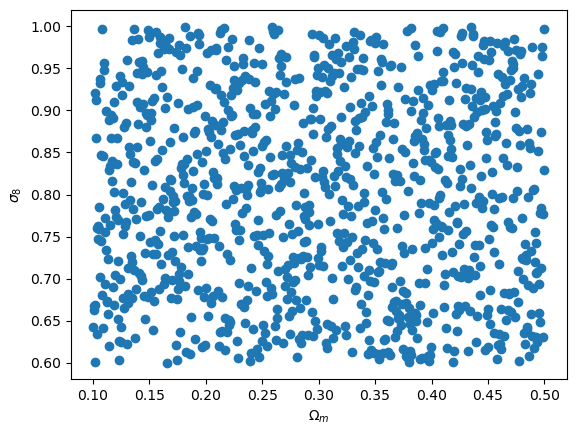

In [9]:
plt.scatter(params[:,0],params[:,1])
plt.xlabel(r'$\Omega_m$')
plt.ylabel(r'$\sigma_8$')

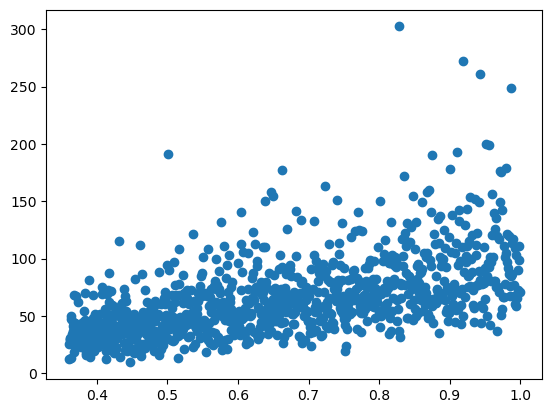

In [14]:
plt.scatter(params[:,1]**2., test_low_fid.mean(axis=1))

In [ ]:
params_full = np.loadtxt('../data/CosmoAstroSeed_IllustrisTNG_L25n256_LH.txt', skiprows = 1, usecols = (1, 2, 3, 4, 5, 6)) # Omega_m sigma_8 A_SN1 A_AGN1 A_SN2 A_AGN2 

(1000, 2)

In [68]:
np.save('../data/noise_realization_hf.npy', noise_realization_hf)
np.save('../data/noise_realization_lf.npy', noise_realization_lf)